In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as tgrad
import torch.nn.functional as F

import os
import time
import tqdm
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 16})

In [34]:
weights = [[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5], [0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]]
n_epochs = 5000

# PINN Weights difference

In [35]:
loss_hists_lists = []

# extract data
for i in range(len(weights)):
    loss_hists_lists.append(pd.read_csv(f'weight-loss/pinn/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}_loss.csv')['MSE_Loss'].to_numpy())
    pass
print('Done')

Done


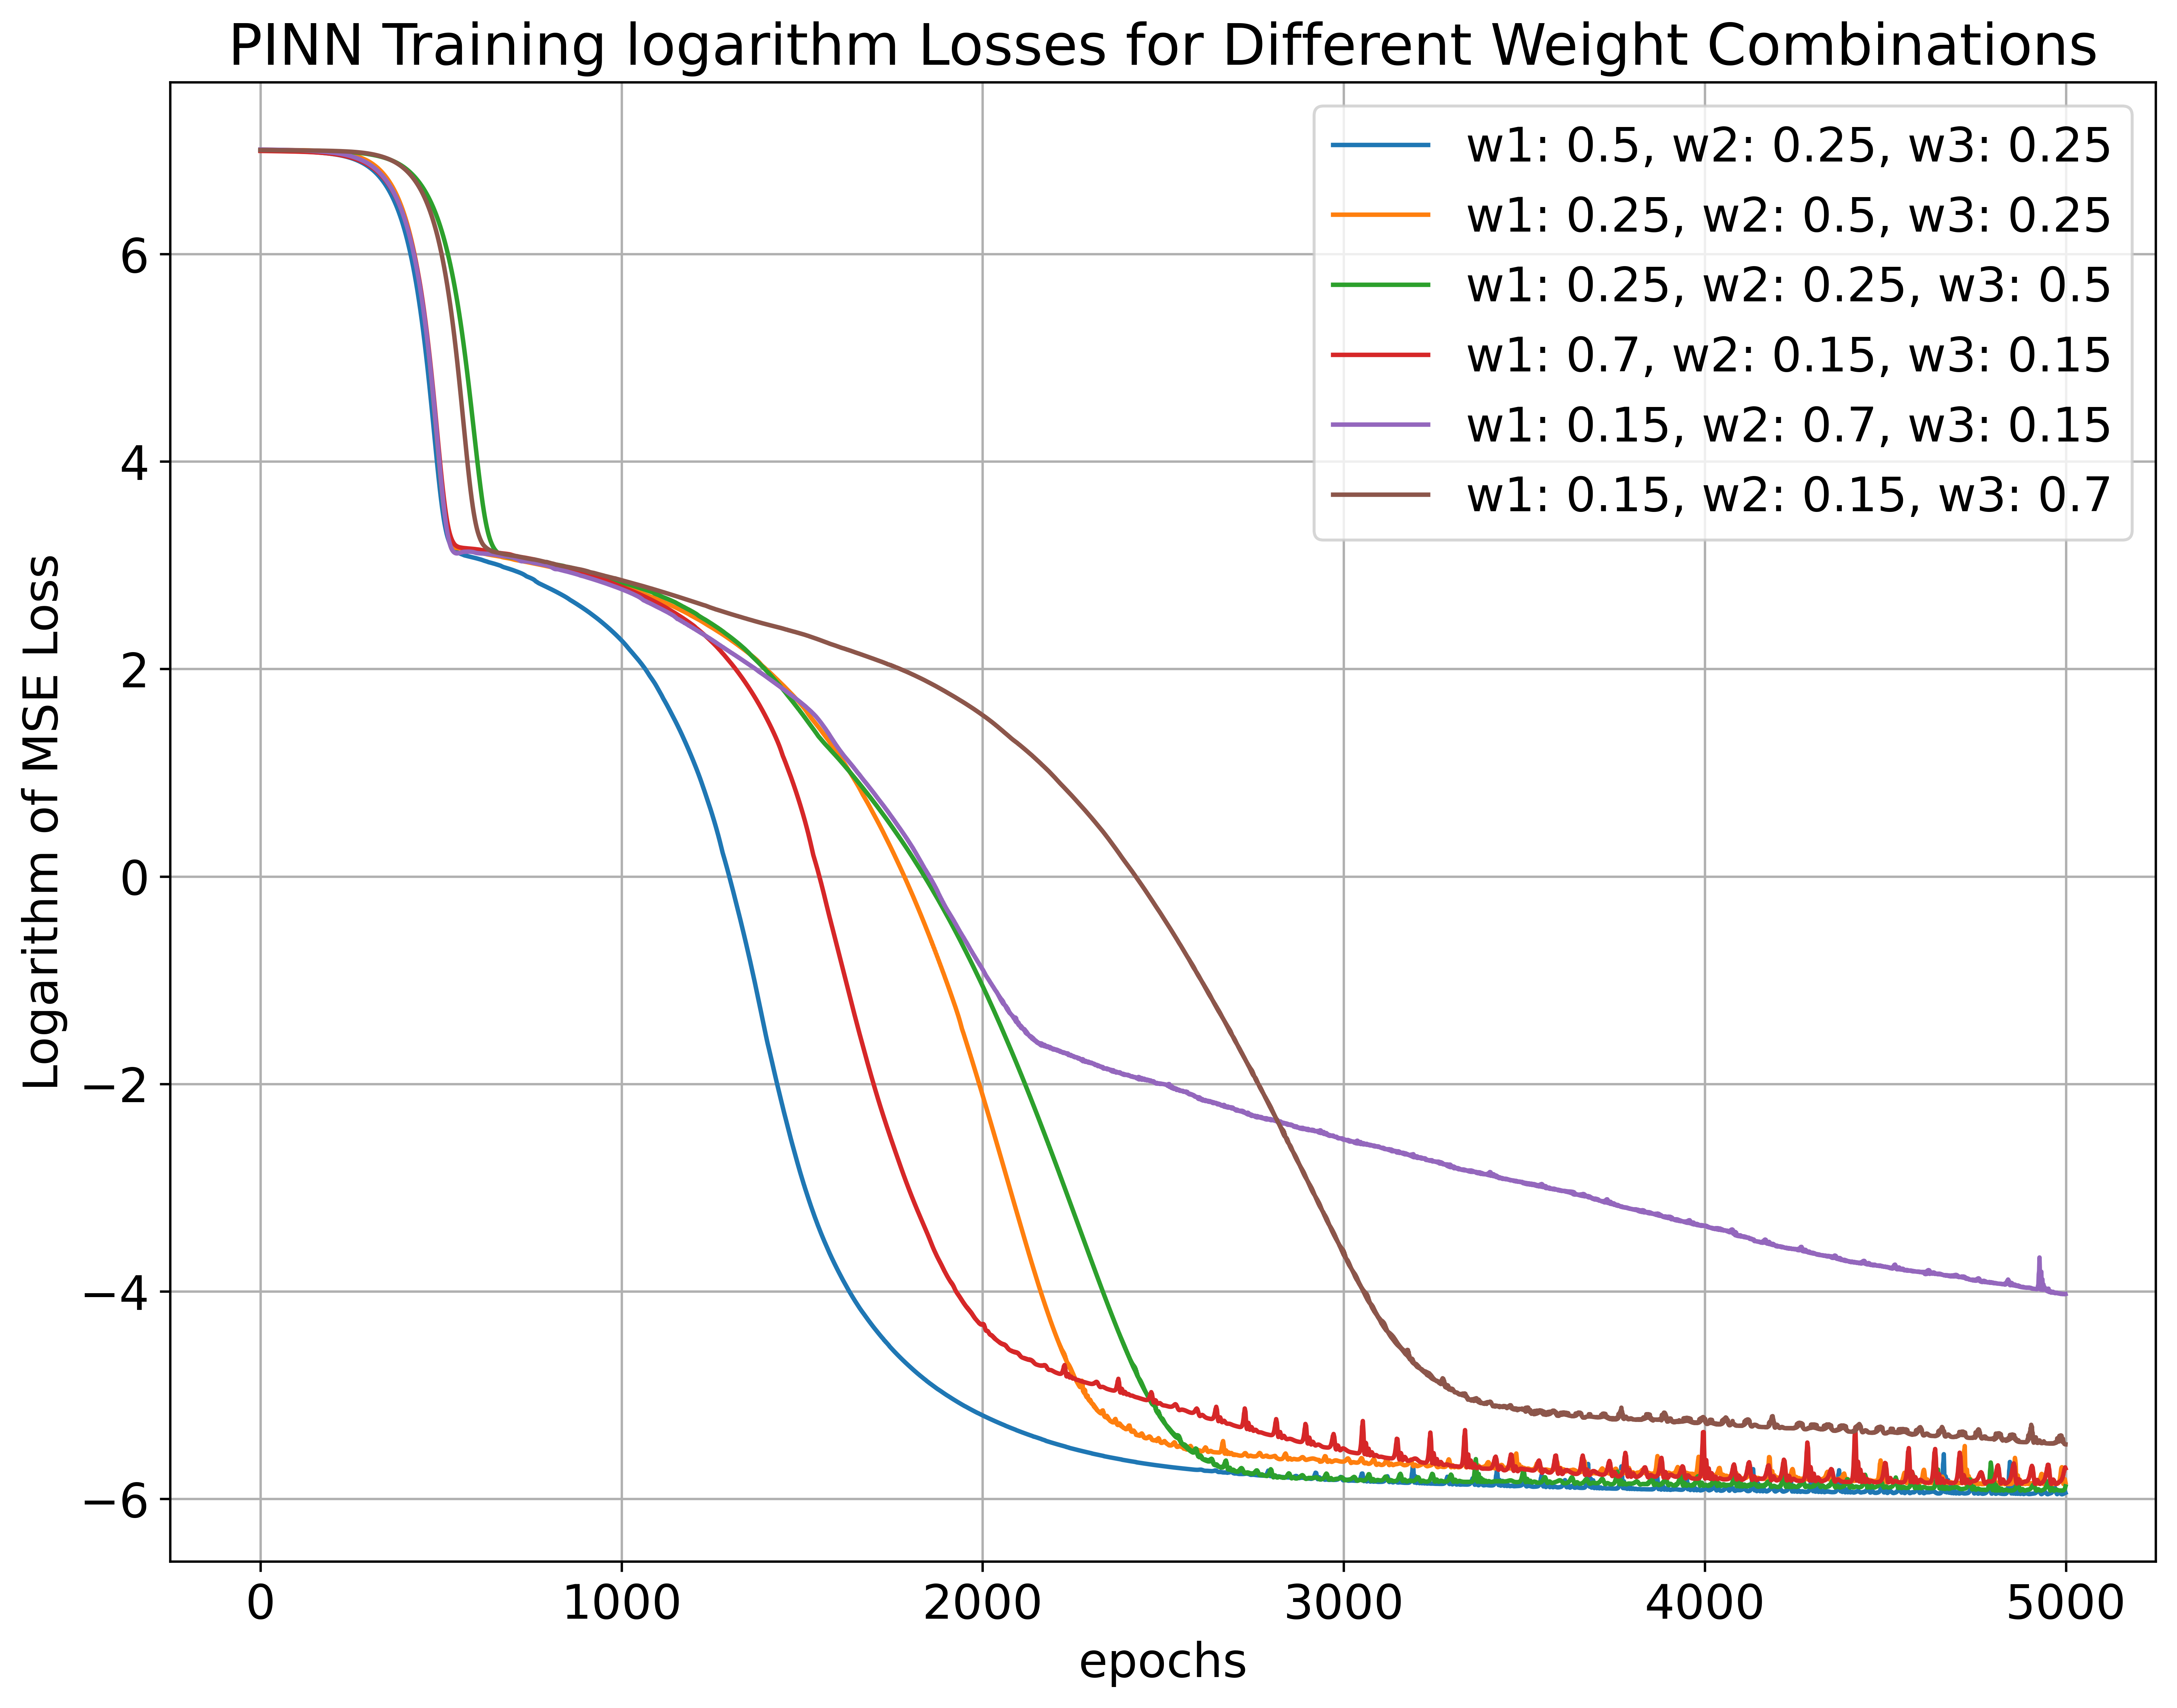

In [36]:
fig = plt.figure(figsize=(12,9))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in loss_hists_lists[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('Logarithm of MSE Loss')
plt.legend()
plt.title(f'PINN Training logarithm Losses for Different Weight Combinations')
plt.grid(True)
plt.savefig('weight-loss/plot/PINN Training logarithm Losses for Different Weight Combinations.png', bbox_inches='tight')

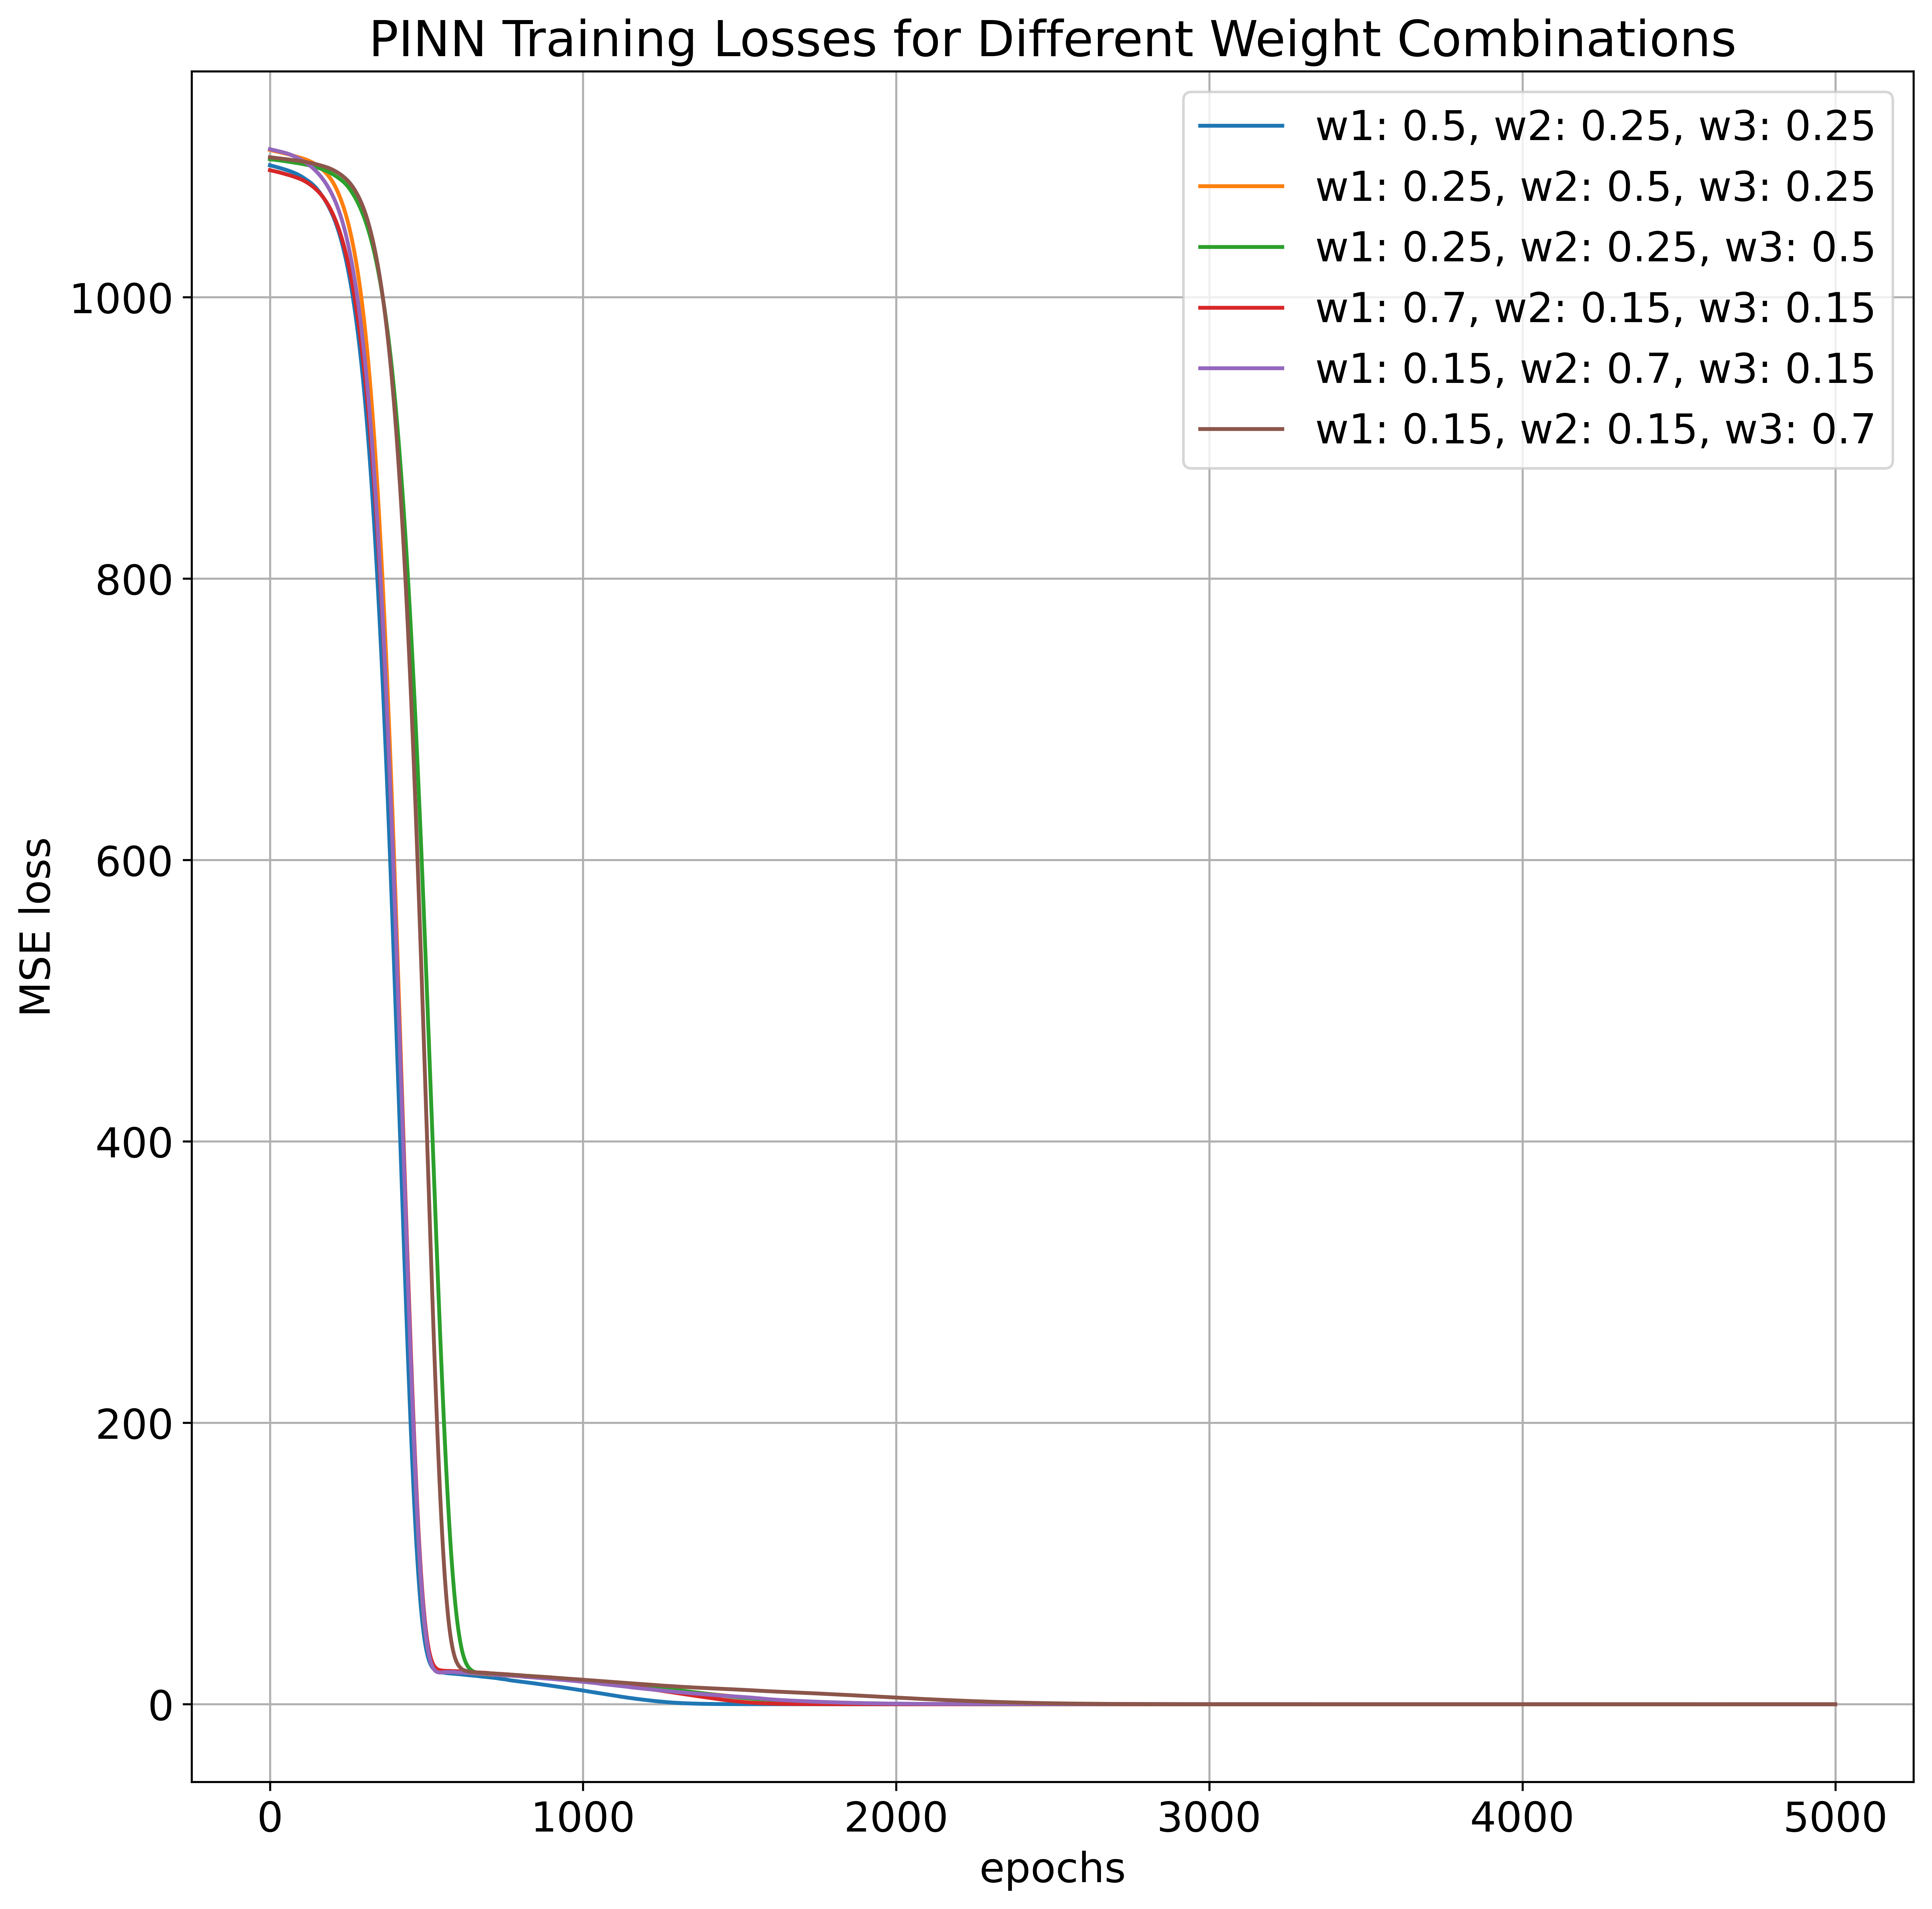

In [37]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(5000), [item for item in loss_hists_lists[i][:5000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('MSE loss')
plt.legend()
plt.title(f'PINN Training Losses for Different Weight Combinations')
plt.grid(True)
plt.savefig('weight-loss/plot/PINN Training Losses for Different Weight Combinations.png', bbox_inches='tight')

# IPINN Weight Difference

In [38]:
loss_hists_lists2 = []
# extract data
for i in range(len(weights)):
    loss_hists_lists2.append(pd.read_csv(f'weight-loss/ipinn/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}_loss.csv')['MSE_Loss'].to_numpy())
    pass
print('Done')

Done


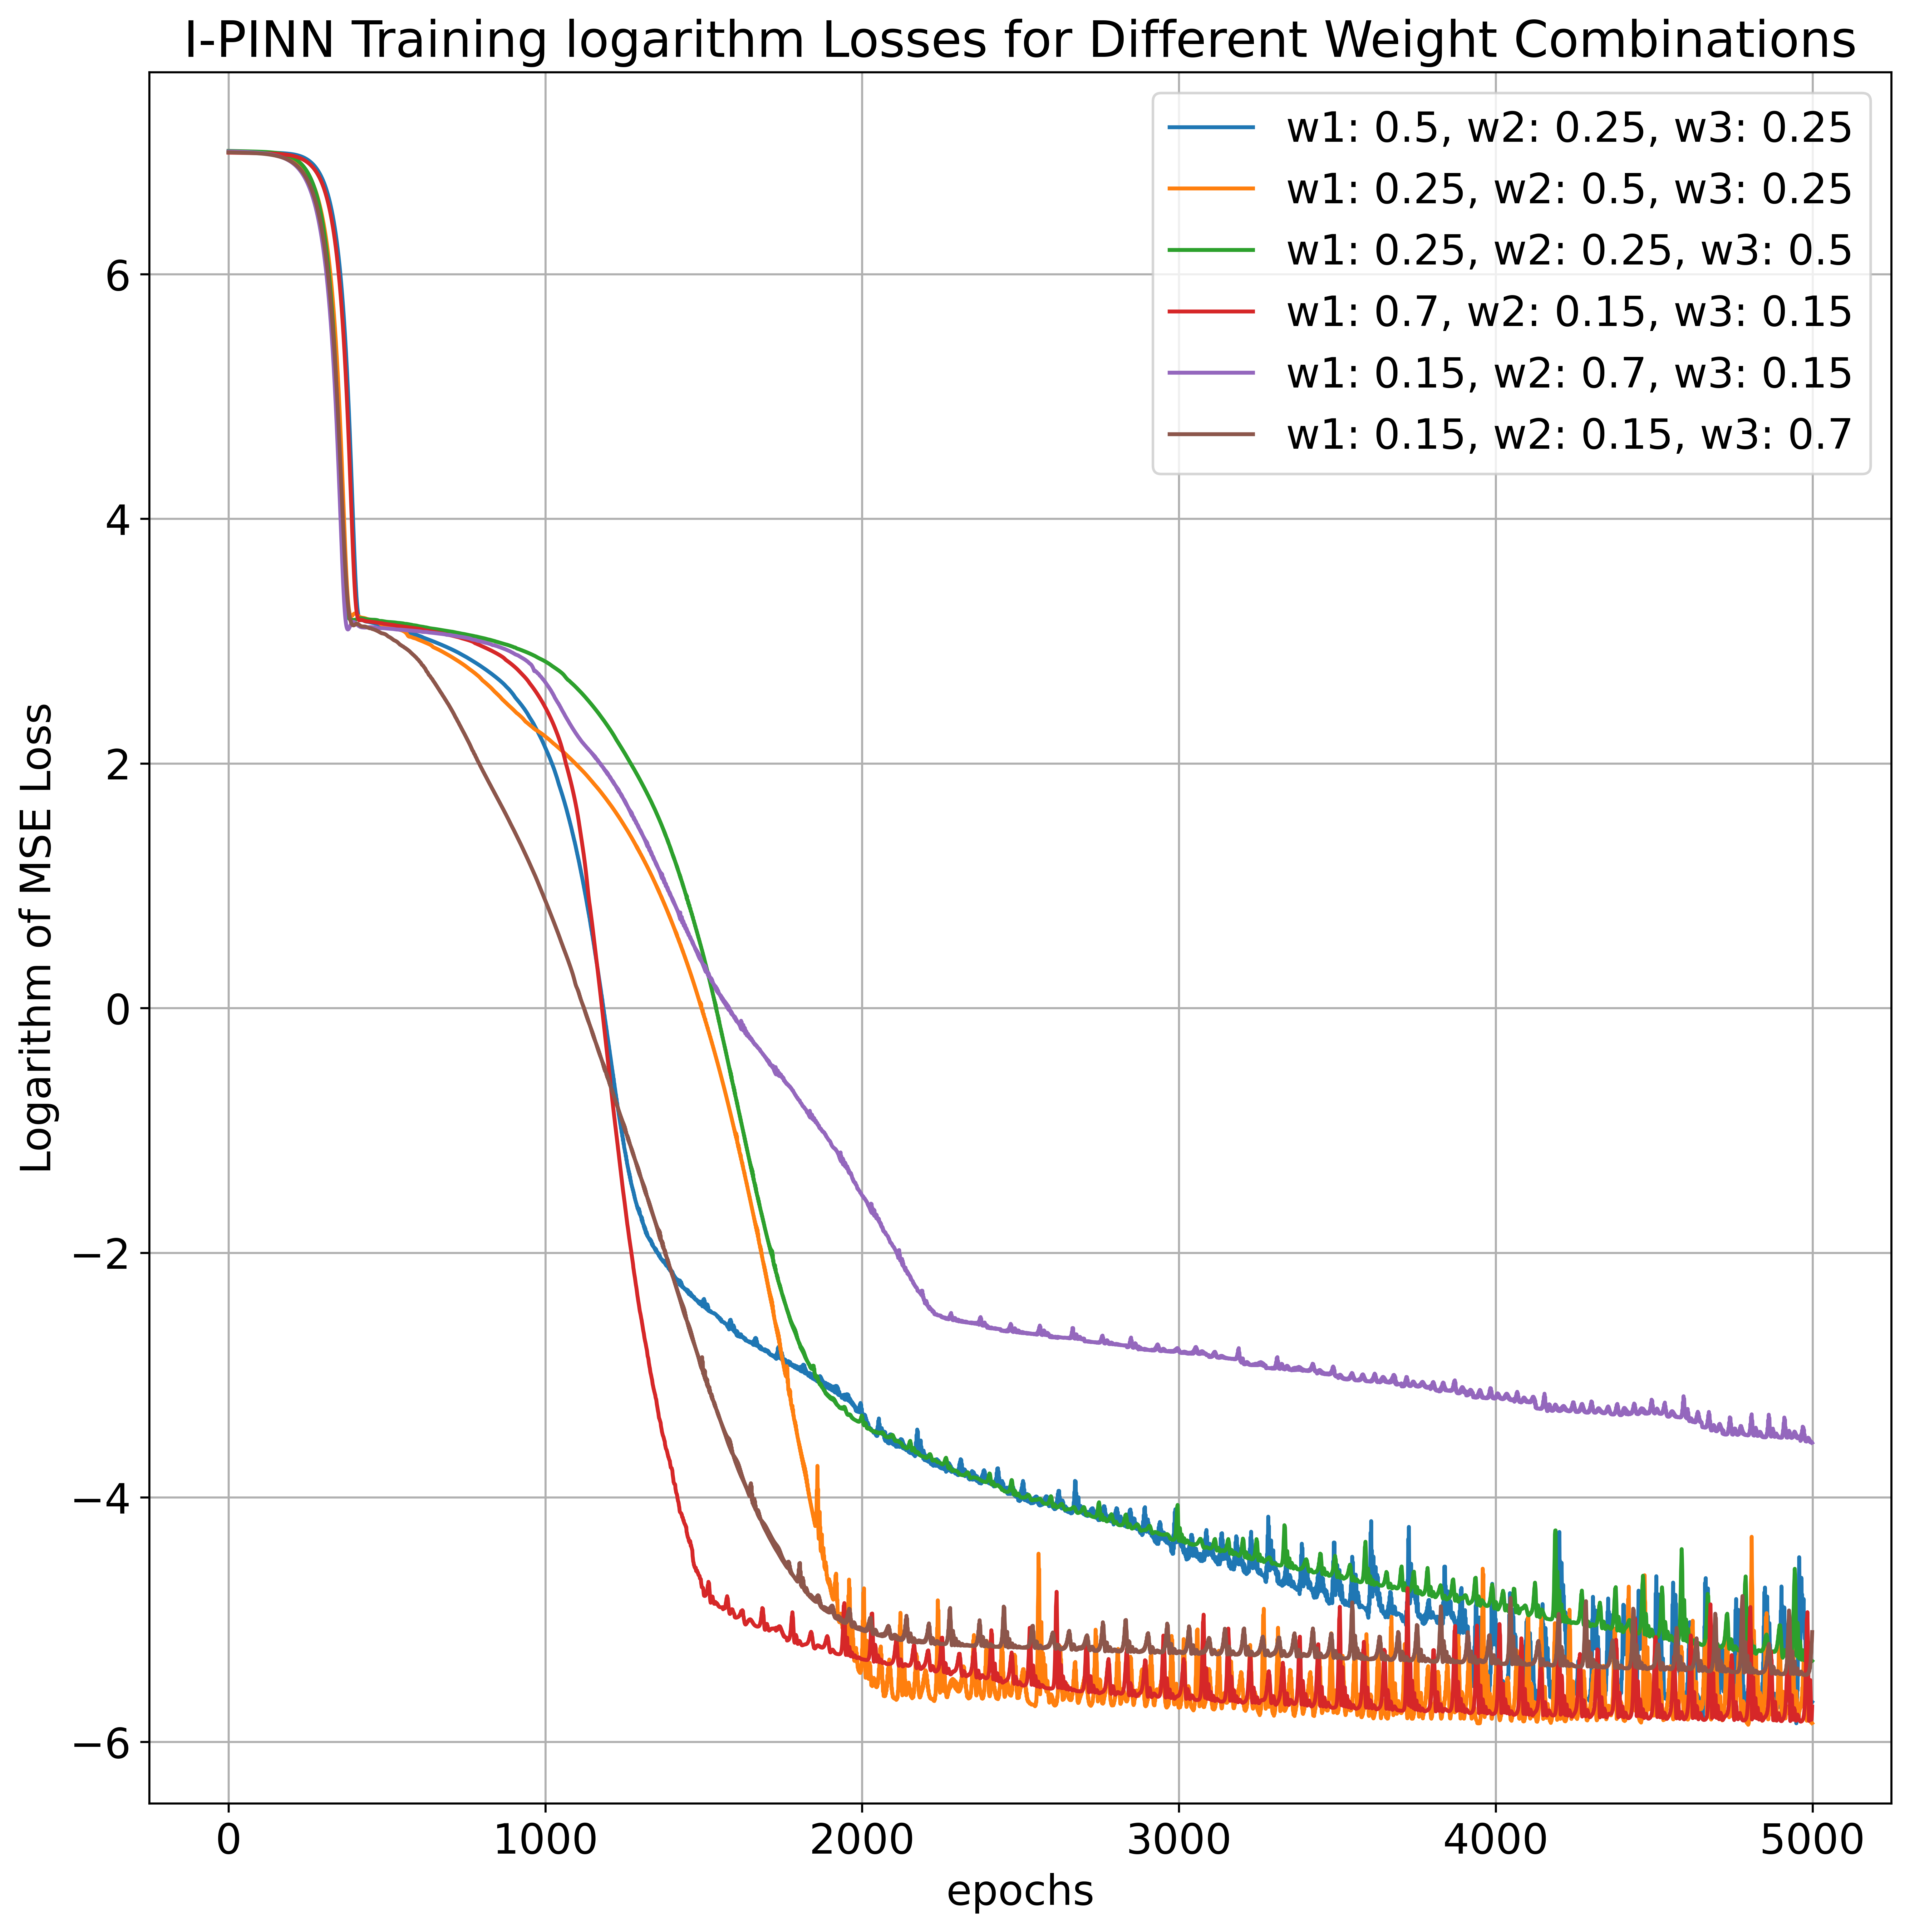

In [39]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in loss_hists_lists2[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('Logarithm of MSE Loss')
plt.legend()
plt.title(f'I-PINN Training logarithm Losses for Different Weight Combinations')
plt.grid(True)
plt.savefig('weight-loss/plot/I-PINN Training logarithm Losses for Different Weight Combinations.png', bbox_inches='tight')

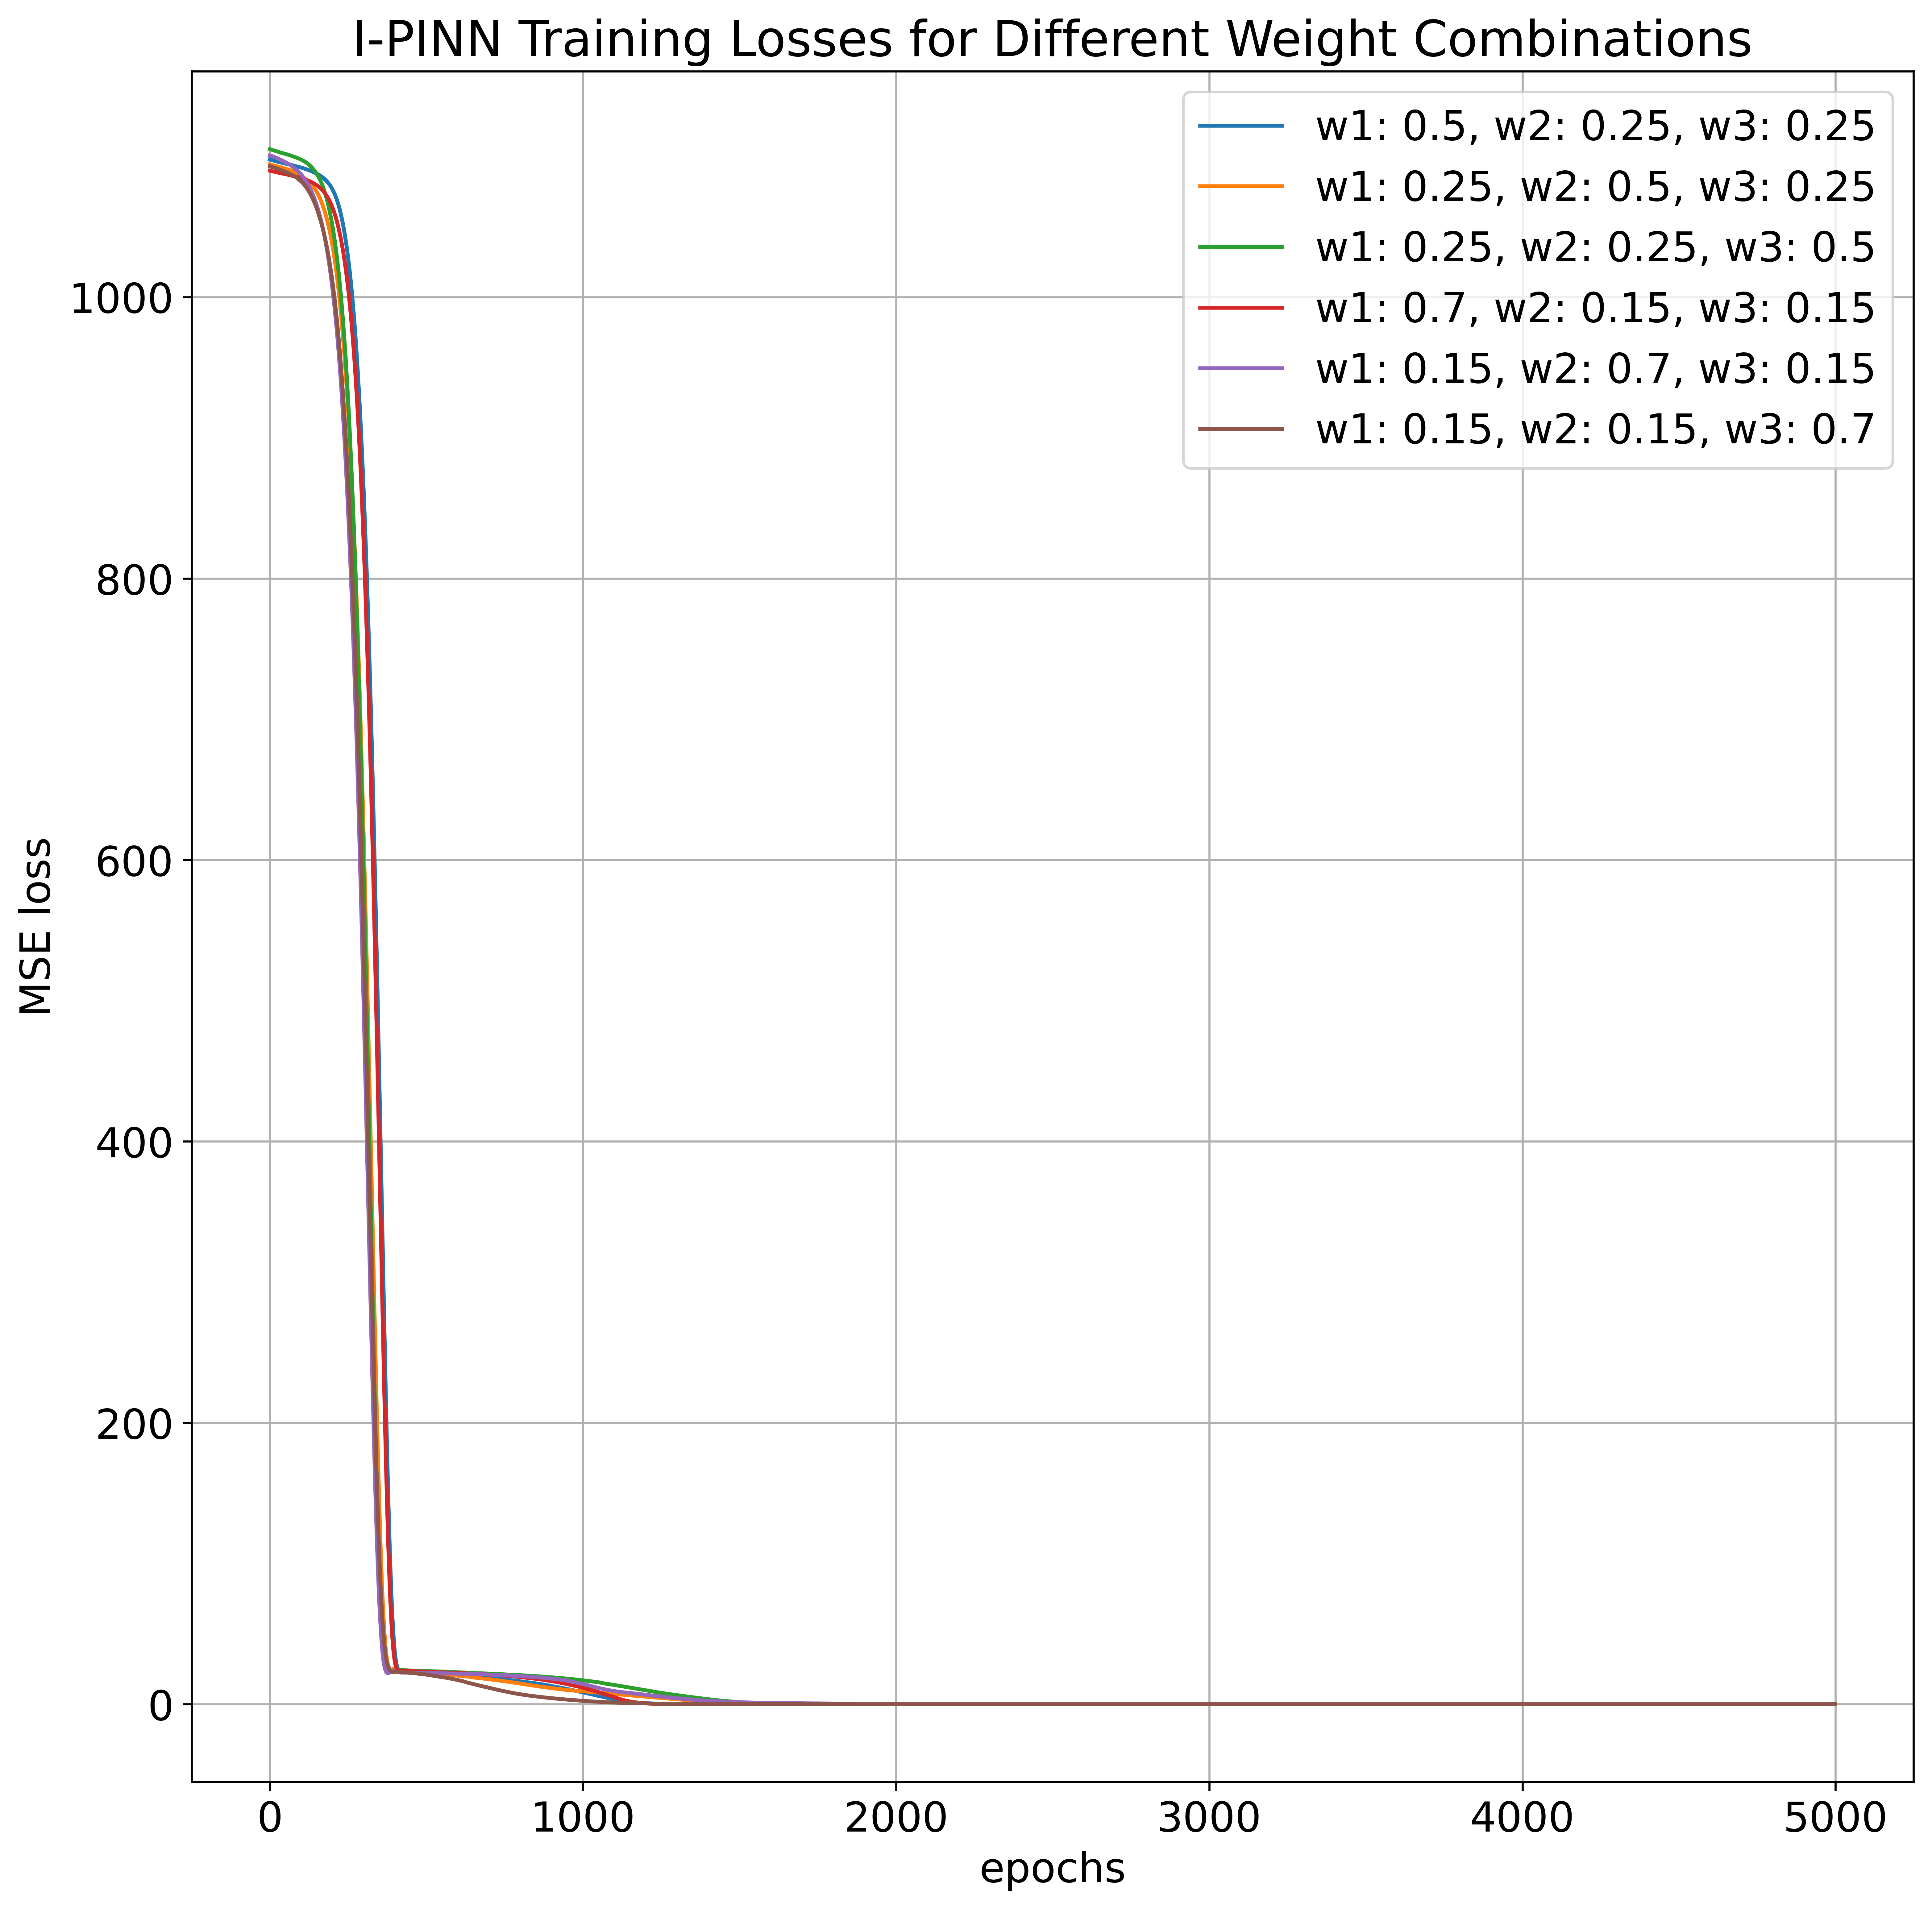

In [40]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(5000), [item for item in loss_hists_lists2[i][:5000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('MSE loss')
plt.legend()
plt.title(f'I-PINN Training Losses for Different Weight Combinations')
plt.grid(True)
plt.savefig('weight-loss/plot/I-PINN Training Losses for Different Weight Combinations.png', bbox_inches='tight')